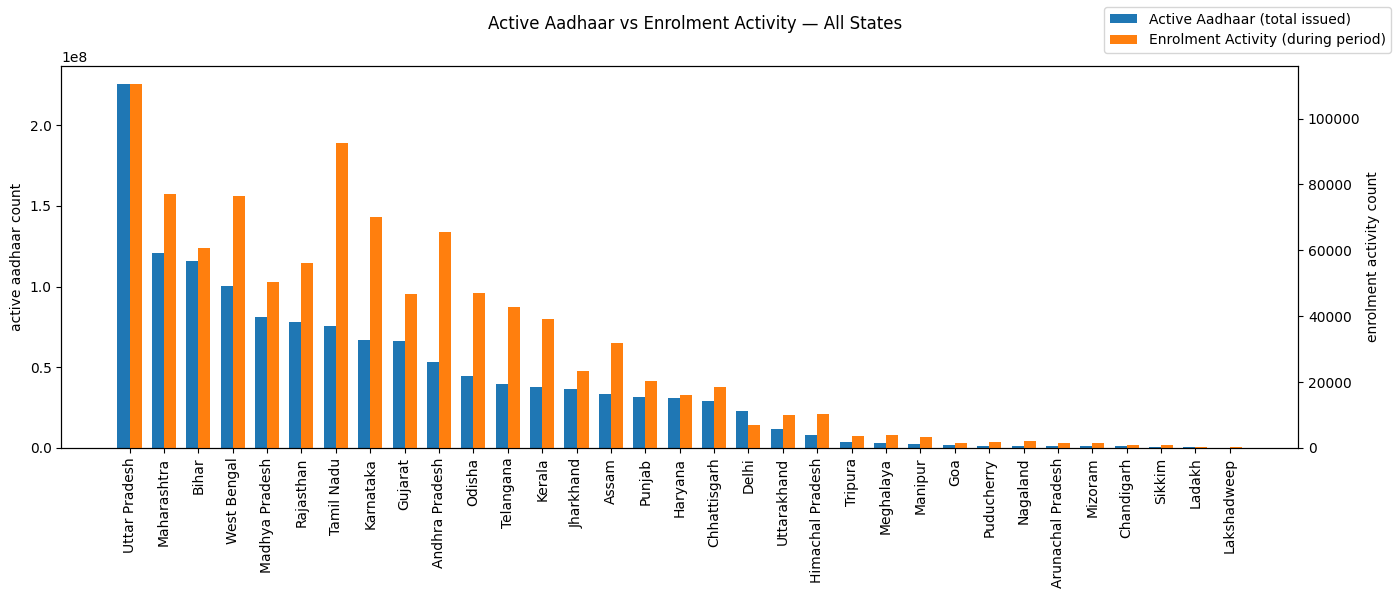

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


enrolment_df=pd.read_parquet("../sql/data/data_cache/enrolment_clean.parquet")
enrolments=(
    enrolment_df
    .groupby("state")
    .size()
    .reset_index(name="enrolment_events")
)


raw=pd.read_excel("../sql/data/AadhaarSaturationReport.xlsx",header=None)

df=raw.iloc[5:41].copy()
df.columns=["sno","state","population","aadhaar_assigned","penetration_ratio"]

df["aadhaar_assigned"]=(
    df["aadhaar_assigned"]
    .astype(str)
    .str.replace(",","")
    .astype(int)
)


df=df.merge(enrolments,on="state",how="inner")


df=df.sort_values("aadhaar_assigned",ascending=False)


x=np.arange(len(df))
width=0.35

fig,ax1=plt.subplots(figsize=(14,6))


bars1=ax1.bar(
    x - width/2,
    df["aadhaar_assigned"],
    width,
    color="tab:blue",
    label="Active Aadhaar (total issued)"
)
ax1.set_ylabel("active aadhaar count")


ax2=ax1.twinx()
bars2=ax2.bar(
    x + width/2,
    df["enrolment_events"],
    width,
    color="tab:orange",
    label="Enrolment Activity (during period)"
)
ax2.set_ylabel("enrolment activity count")

ax1.set_xticks(x)
ax1.set_xticklabels(df["state"],rotation=90)


fig.legend(
    handles=[bars1, bars2],
    loc="upper right"
)

fig.suptitle("Active Aadhaar vs Enrolment Activity — All States")
fig.tight_layout()
plt.show()
